In [18]:

import pandas as pd
import os

# Define paths to your Excel files
files = {
    'US': r"D:\treanding youtube video statistics\USvideos.csv",
    'IN': r"D:\treanding youtube video statistics\INvideos.csv",
    'GB': r"D:\treanding youtube video statistics\GBvideos.csv"
    # Add more countries if needed
}

# Load and combine the data
dfs = []
for region, path in files.items():
    df = pd.read_csv(path, encoding='latin1')  # fixed: using the correct path
    df['region'] = region  # Add a column to identify the region
    dfs.append(df)

# Combine all into one DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
df = combined_df  # set df as the main dataframe

# Show basic info
print("Combined shape:", df.shape)
print(df.head())


Combined shape: (122847, 17)
      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                      

In [19]:
import pandas as pd

# Convert trending_date and publish_time to datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Check missing values
missing_summary = df.isnull().sum()
print("Missing values:\n", missing_summary)


Missing values:
 video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               569
region                      0
dtype: int64


In [22]:
# Step 1: Convert publish_time to datetime, remove timezone
df['publish_time'] = pd.to_datetime(df['publish_time'], utc=True).dt.tz_localize(None)

# Step 2: Convert trending_date to datetime (note the correct format!)
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Step 3: Calculate days it took a video to start trending
df['days_to_trend'] = (df['trending_date'] - df['publish_time'].dt.normalize()).dt.days

In [23]:
top_videos = df.sort_values(by='views', ascending=False).head(10)
print(top_videos[['title', 'channel_title', 'views', 'region']])

                                                   title        channel_title  \
38547  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
38345  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
38146  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
37935  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
37730  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
37531  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
37333  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
37123  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
36913  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
36710  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   

           views region  
38547  225211923     GB  
38345  220490543     GB  
38146  217750076     GB  
3793

In [24]:
avg_days = df.groupby('region')['days_to_trend'].mean().sort_values()
print(avg_days)

region
GB    16.82685
Name: days_to_trend, dtype: float64


In [25]:
top_channels = df['channel_title'].value_counts().head(10)
print(top_channels)

ESPN                                      202
The Tonight Show Starring Jimmy Fallon    197
Netflix                                   193
Vox                                       192
TheEllenShow                              192
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         185
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
Name: channel_title, dtype: int64


In [26]:
top_liked = df.sort_values(by='likes', ascending=False).head(10)
print(top_liked[['title', 'channel_title', 'likes', 'region']])

                                               title channel_title    likes  \
38273  BTS (ë°©íìëë¨) 'FAKE LOVE' Official MV       ibighit  5613827   
38072  BTS (ë°©íìëë¨) 'FAKE LOVE' Official MV       ibighit  5595203   
37861  BTS (ë°©íìëë¨) 'FAKE LOVE' Official MV       ibighit  5530568   
37655  BTS (ë°©íìëë¨) 'FAKE LOVE' Official MV       ibighit  5486349   
37453  BTS (ë°©íìëë¨) 'FAKE LOVE' Official MV       ibighit  5439015   
37247  BTS (ë°©íìëë¨) 'FAKE LOVE' Official MV       ibighit  5386959   
37031  BTS (ë°©íìëë¨) 'FAKE LOVE' Official MV       ibighit  5321402   
36816  BTS (ë°©íìëë¨) 'FAKE LOVE' Official MV       ibighit  5232318   
36611  BTS (ë°©íìëë¨) 'FAKE LOVE' Official MV       ibighit  5150831   
36397  BTS (ë°©íìëë¨) 'FAKE LOVE' Official MV       ibighit  5053329   

      region  
38273     GB  
38072     GB  
37861     GB  
37655     GB  
37453     GB  
37247     GB  
37031     GB  
36816     

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for nicer visuals
sns.set(style="whitegrid")

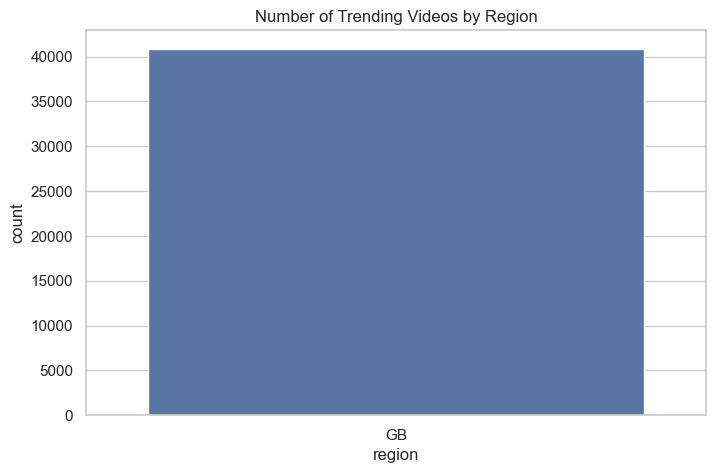

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='region', order=df['region'].value_counts().index)
plt.title('Number of Trending Videos by Region')
plt.show()

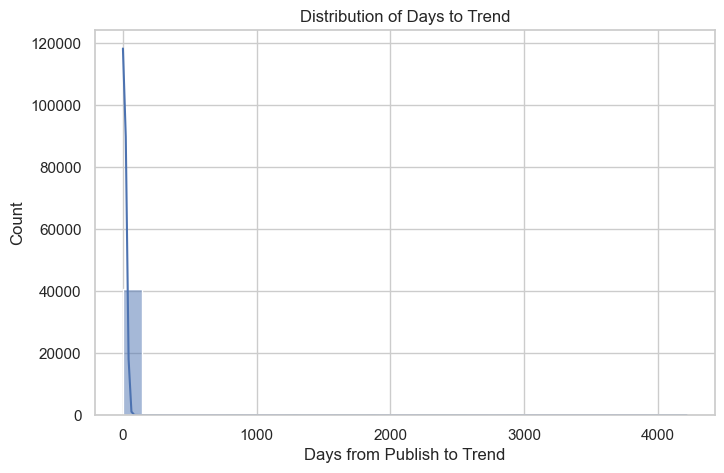

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['days_to_trend'], bins=30, kde=True)
plt.title('Distribution of Days to Trend')
plt.xlabel('Days from Publish to Trend')
plt.show()

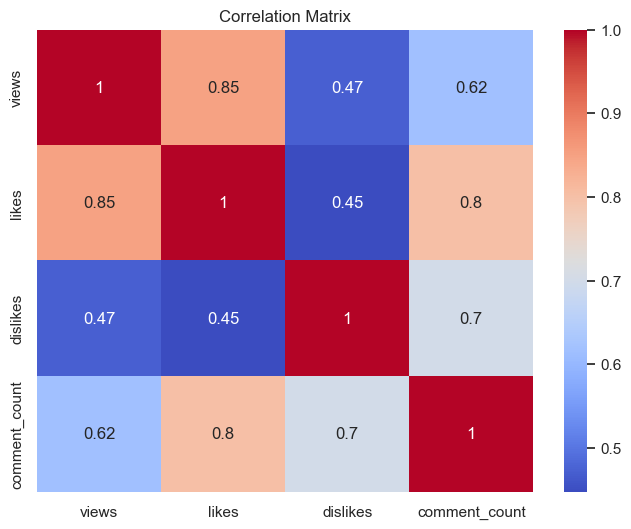

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['views', 'likes', 'dislikes', 'comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [31]:
df.to_csv('cleaned_youtube_trending_data.csv', index=False)

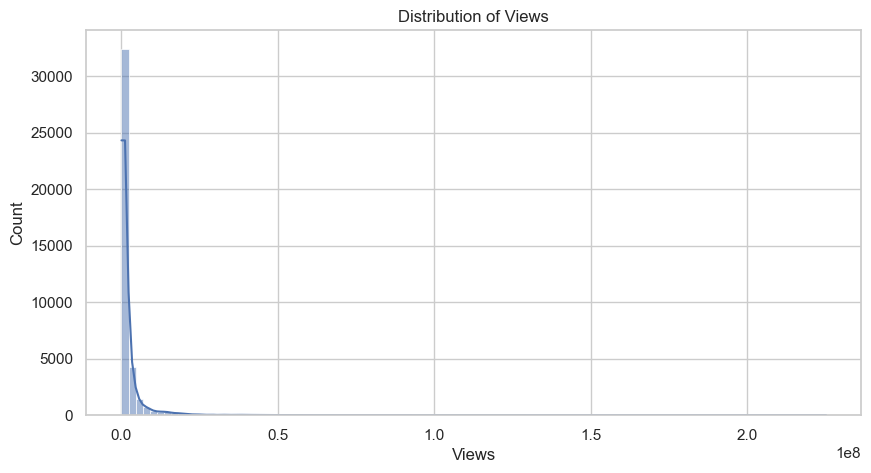

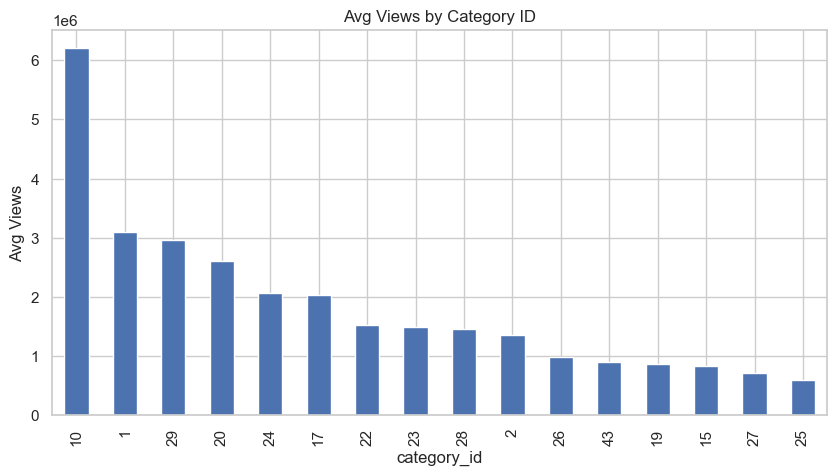

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of views
plt.figure(figsize=(10, 5))
sns.histplot(df['views'], bins=100, kde=True)
plt.title("Distribution of Views")
plt.xlabel("Views")
plt.show()

# Top categories by views
top_categories = df.groupby('category_id')['views'].mean().sort_values(ascending=False)
top_categories.plot(kind='bar', title='Avg Views by Category ID', figsize=(10,5))
plt.ylabel('Avg Views')
plt.show()

In [33]:
!pip install textblob

     ---------------------------------------- 42.0/42.0 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 57.7/57.7 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 636.8/636.8 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 1.5/1.5 MB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 269.6/269.6 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 98.2/98.2 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 78.5/78.5 kB 2.2 MB/s eta 0:00:00


In [34]:
from textblob import TextBlob

# Apply sentiment on titles
df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Apply sentiment on tags
df['tags_sentiment'] = df['tags'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

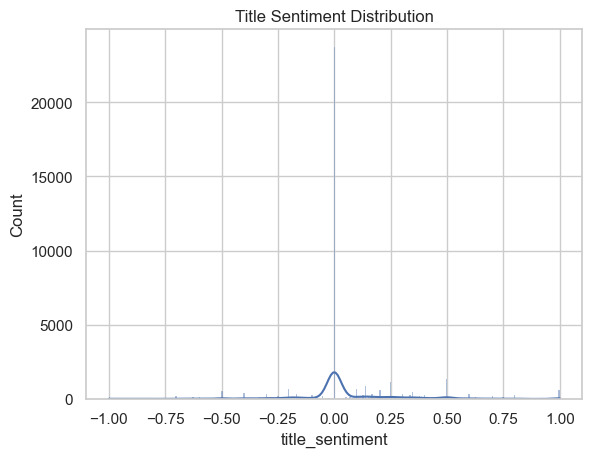

In [36]:
# Sentiment distribution
sns.histplot(df['title_sentiment'], kde=True)
plt.title("Title Sentiment Distribution")
plt.show()